In [11]:
:dep plotly = { version = "=0.8.0" } # 0.8.1 has breaking changes
:dep itertools-num = "0.1.3"

:dep dsp = { path = "/Users/antoine/FlowDSP/plugins.git/dsp" }

In [12]:
#![allow(warnings)]

In [13]:
use itertools_num::linspace;
use plotly::common::{
    ColorScale, ColorScalePalette, DashType, Fill, Font, Line, LineShape, Marker, Mode, Title,
};
use plotly::layout::{Axis, BarMode, Layout, Legend, TicksDirection};
use plotly::{Bar, Plot, Scatter};

In [14]:
use dsp;

In [15]:
fn curve1(fs: f32, t: f32, y1: f32, y2: f32, w: f32) -> Vec<f32> {
    let t = (t * fs);
    
    // generate signal 
    let mut signal = vec![0.0; t as usize];
    
    for (x, sample) in signal.iter_mut().enumerate() {
        *sample = dsp::curve(t as f32, y1, y2, w, x as f32);
    }
    
    signal
}

fn curve2(fs: f32, t: f32, k: f32) -> Vec<f32> {
    let t = (t * fs);
    
    // generate signal 
    let mut signal = vec![0.0; t as usize];
    
    for (x, sample) in signal.iter_mut().enumerate() {
        *sample = dsp::curve2(t, k, x as f32);
    }
    
    signal
}

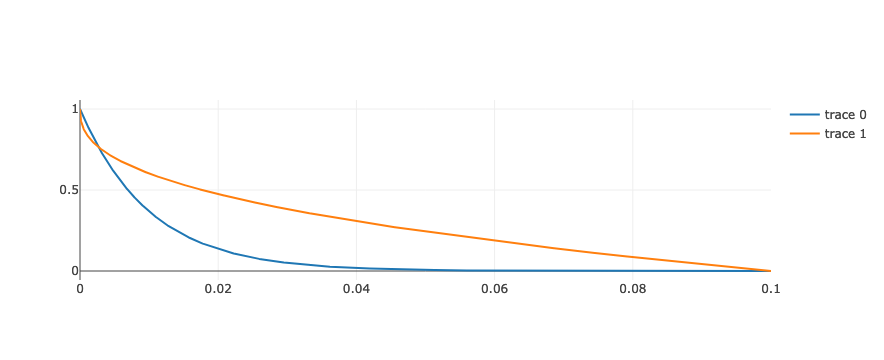

In [24]:
let fs = 48000.0;
let t = 0.1;
let w = -10.0;
let k = 0.4;

let xs: Vec<f32> = linspace(0., t, (fs*t) as usize).collect();

let ys_1 = curve1(fs, t, 1.0, 0.0, w);
let ys_2 = curve2(fs, t, k);

let trace_1 = Scatter::new(xs.clone(), ys_1).mode(Mode::Lines);
let trace_2 = Scatter::new(xs.clone(), ys_2).mode(Mode::Lines);

let mut plot = Plot::new();
plot.add_trace(trace_1);
plot.add_trace(trace_2);

let layout = Layout::new().height(300);
plot.set_layout(layout);
plot.lab_display();